## K-means Clustering:
- Label'sız datasetlerinde kullanılan bir Unsupervised learning modelidir.
- Modelin amacı dataset içindeki verileri feature'ların özelliklerine göre clustering yapmaktır.
- Model her bir data nooktasını sağlanan fature özelliklerine göre kümeleyene kadar tekrarlı olarak çalışır.
- Modelin işlemi bitince her bir cluster'ın centroid i belli olur ve buna göre de label alır.

### Use Cases
- Belge Sınıflandırma
- Teslimat mağazası optimizasyonu
- Müşteri sınıflandırma
- Dolandırıcılık tespiti

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.columns = df.columns.str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [9]:
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.drop(columns="cust_id", inplace=True)

In [19]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [20]:
df.shape

(8636, 17)

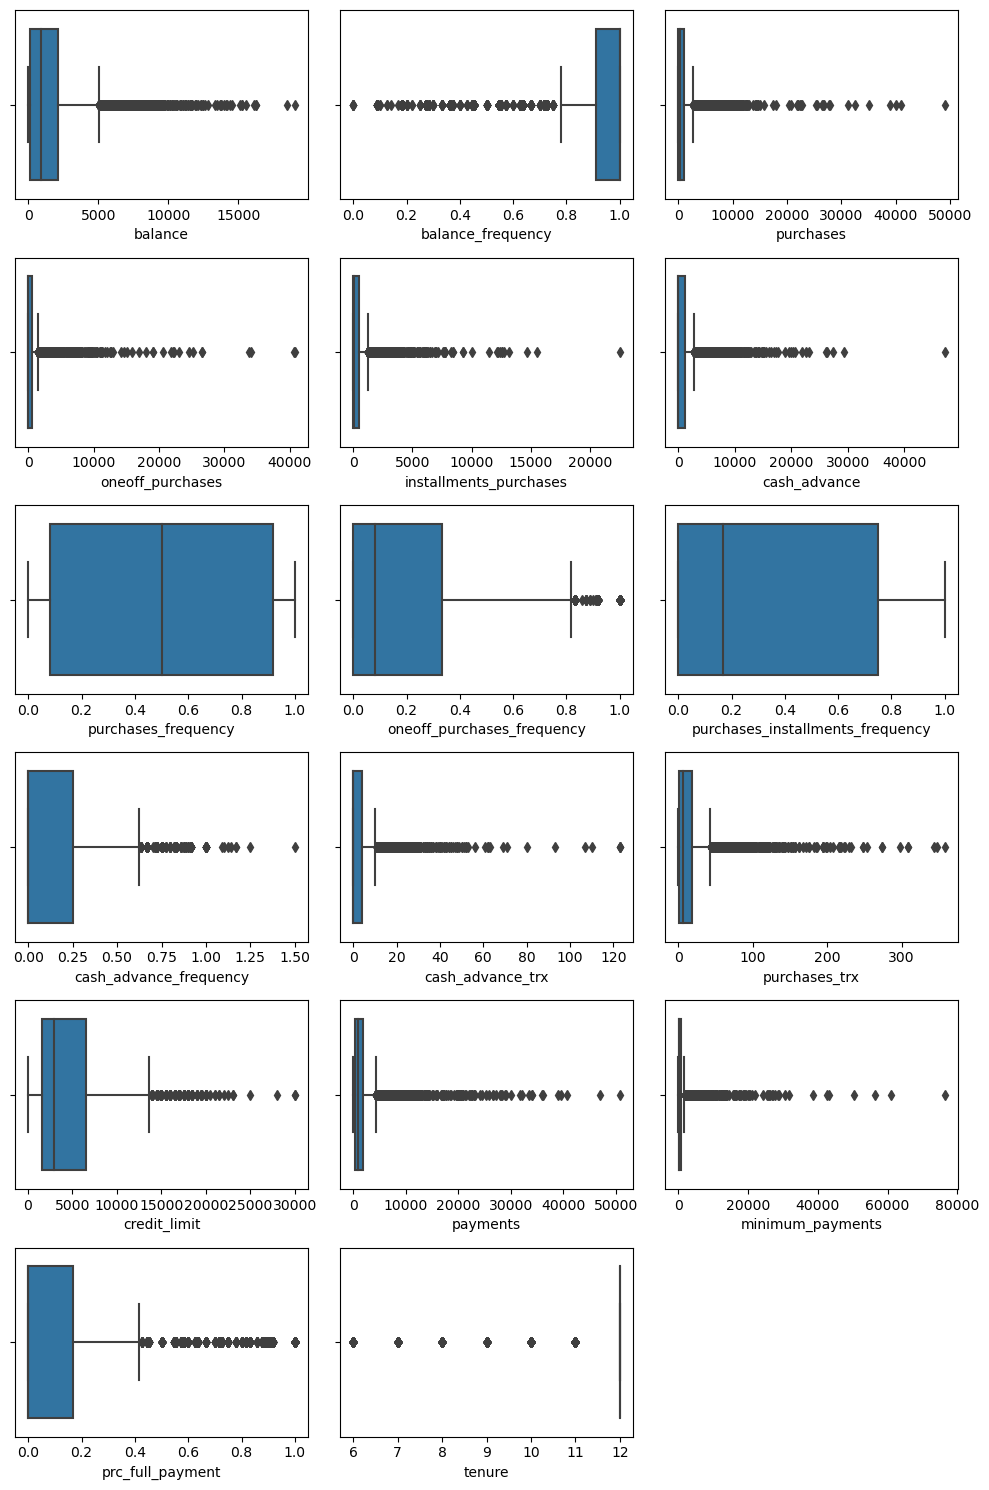

In [32]:
plt.figure(figsize=(10,15))
i = 1
for column in df.columns:
    plt.subplot(6, 3, i)
    sns.boxplot(column, data=df)
    i += 1
    
plt.tight_layout()

In [49]:
drop_list = list(df[df["oneoff_purchases"] > 30000].index)+\
            list(df[df["installments_purchases"] > 20000].index)+\
            list(df[df["cash_advance"] > 40000].index)+\
            list(df[df["cash_advance_frequency"] > 1.4].index)+\
            list(df[df["minimum_payments"] > 70000].index)

In [52]:
drop_list = list(set(drop_list))
drop_list

[3937, 1604, 550, 5260, 2159, 501, 4376, 3038]

In [53]:
df.drop(index = drop_list ,inplace=True)

In [54]:
df.shape

(8628, 17)

### Scaling

In [71]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing data
normalized_df = normalize(scaled_df)

# converting array to dataframe
normalized_df = pd.DataFrame(normalized_df)

# reducting the dimensions of the data
pca = PCA(n_components = 2) # Principal component analysis (PCA).
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]

X_principal.head()

,P1,P2
0,-0.485254,-0.687738
1,-0.528103,0.536846
2,0.322418,0.258504
3,-0.565224,-0.501265
4,0.321170,-0.247229


<b>Elbow Criterion:</b>

In [74]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ 

In [75]:
sse

{1: 4007.8457968372595,
 2: 2053.9452690406415,
 3: 1294.568882561888,
 4: 896.7713455872158,
 5: 703.6900212692971,
 6: 584.5775621409795,
 7: 498.98557980107,
 8: 422.3643556341795,
 9: 370.83240728246415}

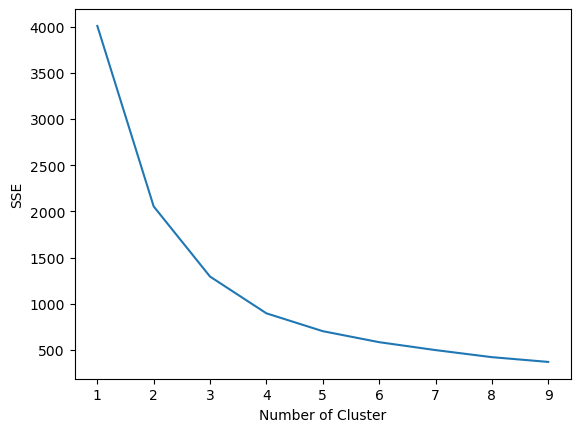

In [76]:
plt.plot(list(sse.keys()), list(sse.values()))

plt.xlabel("Number of Cluster")
plt.ylabel("SSE");

<b>Silhouette Coefficient Method:</b>

In [84]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    model = KMeans(n_clusters = num_clusters, random_state = 42)
    model.fit(X_principal)
    cluster_labels = model.labels_
    silhoutte_avg = silhouette_score(X_principal, cluster_labels)
    print(f"n_clusters : {num_clusters} and silhoutte score :{round(silhoutte_avg, 2)}")

n_clusters : 2 and silhoutte score :0.44
n_clusters : 3 and silhoutte score :0.45
n_clusters : 4 and silhoutte score :0.43
n_clusters : 5 and silhoutte score :0.4
n_clusters : 6 and silhoutte score :0.39
n_clusters : 7 and silhoutte score :0.41
n_clusters : 8 and silhoutte score :0.4
n_clusters : 9 and silhoutte score :0.39


In [85]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

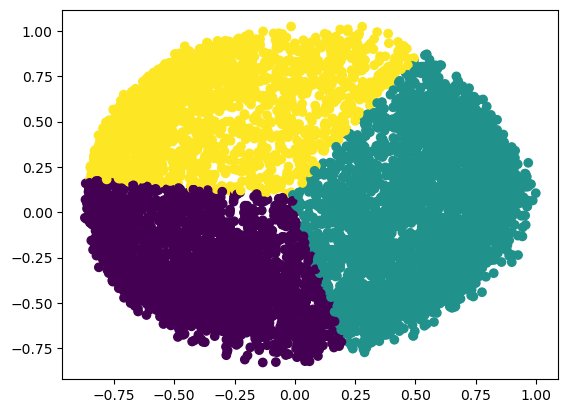

In [87]:
plt.scatter(X_principal["P1"], X_principal["P2"], c = KMeans(n_clusters=3).fit_predict(X_principal));

### <u>Accuracy metrics</u>

As opposed to classfication, it is difficult to assess the quality of results from clustering. Here, a metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

There are internal and external goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics.

<u> <b>External Goodness Metrics</b></u>

F-measure, Normalized Mutual Information(the average mutual information between every pair of clusters and their class), Rand Index etc.

<u> <b>Internal Goodness Metrics</b></u>

Davies-Bouldin index,Silhouette index,Dunn index,Partition Coefficient, Entropy,Separation Index,Xie and Beni's Index etc.

<u> <b>Normalized Mutual Information (NMI)</b></u>

Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means a perfect match.

<u> <b>Adjusted Rand Score (ARS)</b></u>

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.